<a href="https://colab.research.google.com/github/anjorisarabhai/OIBSIP/blob/main/hsv_rgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload an image file:


Saving images.jpeg to images.jpeg
Successfully loaded image 'images.jpeg' as RGB.
Converted image from RGB to HSV.
Converted image from HSV back to RGB.
Displaying all three images for comparison...


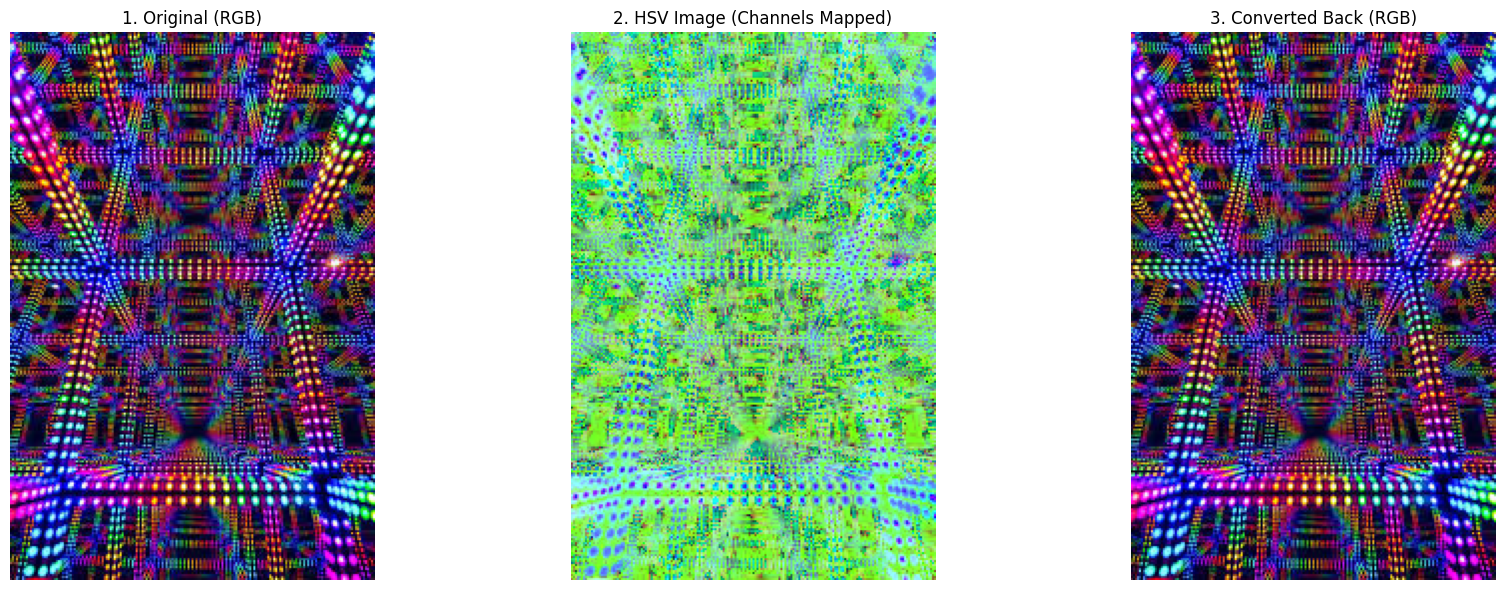


Note: Minor precision difference between images: 38686.0


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# -------------------------------------------------------------------
# 1. Upload and Load Image
# -------------------------------------------------------------------

def upload_and_load_rgb():
    """
    Uploads an image in Colab, reads it with OpenCV, and ensures it's RGB.
    """
    print("Please upload an image file:")
    uploaded = files.upload()

    if not uploaded:
        print("No file uploaded. Exiting.")
        return None

    # Get the name of the uploaded file
    filename = list(uploaded.keys())[0]

    # Read the image using OpenCV
    # cv2.imdecode reads the file from memory
    img_bgr = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), -1)

    if img_bgr is None:
        print("Could not decode image. Please upload a valid image file.")
        return None

    # Handle transparency channel (if present, e.g., in PNG)
    if img_bgr.shape[2] == 4:
        print("Image has an alpha channel. Removing it.")
        img_bgr = img_bgr[:, :, :3]

    # Convert from BGR (OpenCV's default) to RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    print(f"Successfully loaded image '{filename}' as RGB.")
    return img_rgb

# -------------------------------------------------------------------
# 2. Main Execution
# -------------------------------------------------------------------

# Load the original RGB image
original_rgb = upload_and_load_rgb()

if original_rgb is not None:

    # --- Convert RGB to HSV ---
    # 🎨
    img_hsv = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2HSV)
    print("Converted image from RGB to HSV.")

    # --- Convert HSV back to RGB ---
    # 🖼️
    converted_back_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    print("Converted image from HSV back to RGB.")

    # --- Display the results ---
    print("Displaying all three images for comparison...")

    plt.figure(figsize=(18, 6))

    # 1. Original RGB Image
    plt.subplot(1, 3, 1)
    plt.imshow(original_rgb)
    plt.title("1. Original (RGB)")
    plt.axis('off')

    # 2. HSV Image
    # Note: Matplotlib's imshow expects RGB data.
    # Displaying the HSV image directly won't look like you expect,
    # but it shows the H, S, and V channels mapped to R, G, B.
    plt.subplot(1, 3, 2)
    plt.imshow(img_hsv)
    plt.title("2. HSV Image (Channels Mapped)")
    plt.axis('off')

    # 3. Converted-back RGB Image
    plt.subplot(1, 3, 3)
    plt.imshow(converted_back_rgb)
    plt.title("3. Converted Back (RGB)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Check if the images are identical (they should be, barring minor precision)
    difference = np.sum(original_rgb.astype("float") - converted_back_rgb.astype("float"))
    if difference < 1e-6:
        print("\nSuccess: The original RGB and the converted-back RGB are identical.")
    else:
        print(f"\nNote: Minor precision difference between images: {difference}")